# Logistic Regression

The purpose of this is to review Python syntax by fitting
a logistic regression over simulated data.

In [40]:
import numpy as np
import pandas as pd
from numpy.linalg import inv
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
import tensorflow as tf

### Data Generating Process

In [41]:
def inverse_logit(x):
    return(1 / (1 + np.exp(-x)))

In [43]:
np.random.seed(123)
X1 = np.random.normal(1,3,size=10000)
X2 = np.random.normal(-3,1,size=10000)
Z = 3 + 5*X1 - 2*X2
probs = inverse_logit(Z)
y = np.random.binomial(size=10000,n=1,p=probs)

In [44]:
# Create pandas dataframe
df = pd.DataFrame(
    {'X1': X1,
     'X2': X2,
     'y': y        
    }
)

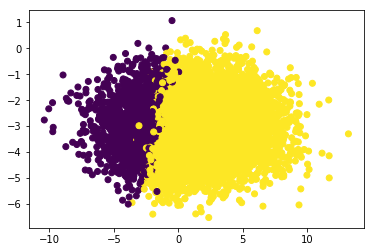

In [45]:
plt.scatter(X1,X2,c=y)
plt.show()

### Scikit Learn

In [46]:
lr = LogisticRegression(random_state=0, solver='lbfgs')

In [47]:
model = lr.fit(df[['X1','X2']],df['y'])

In [48]:
print(model.intercept_)
print(model.coef_)

[ 2.70301182]
[[ 4.59871689 -1.85300242]]


### From Scratch

Likelihood Function:

$L(\beta_0,\beta) = \prod_{i=1}^{n} p(x_i)^{y_i}(1-p(x_i))^{1-y_i}$  

Log-likelihood Function:

$l(\beta_0,\beta) = \sum_{i=1}^{n} y_i\log{p(x_i)} + (1-y_i)\log{(1-p(x_i))}$

Derivative of log-likelihood with respect to $\beta$

$\frac{\partial l}{\partial \beta_j} = \sum_{i=1}^{n}(y_i-p(x;\beta_0,\beta))x_{ij}$

Hessian Matrix (second derivative:

$H = XWX^T$

So need to solve:

$\Delta_k = (X^TW_kX)^{-1}X^T(y-p_k)$

Newton's Method for Numerical Optimization

$x_{n+1} = x_n - \Delta_k$



In [50]:
constant = np.repeat(1,10000)
X = np.vstack((constant,X1,X2)).T

In [51]:
beta = np.array([0,0,0])

In [52]:
delta=np.array([1,1,1])

In [53]:
i = 1
while delta.max() > 0.000001:
    i += 1
    probs = np.exp(np.dot(X,beta)) / (1 + np.exp(np.dot(X,beta)))
    W = np.diag(probs * (1-probs))
    delta = np.dot(inv(np.dot(np.dot(X.T,W),X)) , np.dot(X.T,(y-probs)))
    beta = beta + delta
    if i == 10000:
        break

In [54]:
beta

array([ 2.78741393,  4.79954004, -1.94190089])

### Tensorflow

In [55]:
sess = None

def reset_vars():
    sess.run(tf.global_variables_initializer())

def reset_tf():
    global sess
    if sess:
        sess.close()
    tf.reset_default_graph()
    sess = tf.Session()
    
reset_tf()

In [56]:
reset_tf()

W = tf.Variable(tf.zeros((3, 1)), name="weight")

x = tf.placeholder(shape=[None, 3], dtype=tf.float32, name='x')
y_label = tf.placeholder(shape=[None, 1], dtype=tf.float32, name='y_label')

y_ = tf.matmul(x, W)
loss = tf.reduce_mean(
    tf.nn.sigmoid_cross_entropy_with_logits(logits=y_, labels=y_label))

In [57]:
predicted = tf.cast(tf.nn.sigmoid(y_) > 0.5, np.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, y_label), np.float32))

In [87]:
train = tf.train.GradientDescentOptimizer(0.5).minimize(loss)

reset_vars()

BATCH_SIZE = 100
for i in range(20000):
    j = np.random.choice(len(y), BATCH_SIZE, replace=False)
    sess.run(train, feed_dict={x: X[j,:], 
                               y_label: y[j].reshape(-1,1)})
    if i % 5 == 0:
        print(sess.run([loss, accuracy], feed_dict={x: X[j,:], 
                                                    y_label: y[j].reshape(-1, 1)}))

[0.22179478, 0.97000003]
[0.15414709, 0.95999998]
[0.089866266, 0.99000001]
[0.10427938, 0.98000002]
[0.12405591, 0.98000002]
[0.058563758, 1.0]
[0.09682966, 0.97000003]
[0.10067656, 0.97000003]
[0.07220833, 0.98000002]
[0.078541659, 0.97000003]
[0.13049039, 0.94999999]
[0.082743779, 0.97000003]
[0.086705856, 0.98000002]
[0.10568161, 0.94]
[0.11603574, 0.94]
[0.075441666, 0.98000002]
[0.10049374, 0.94]
[0.095950611, 0.95999998]
[0.11202498, 0.95999998]
[0.032974519, 0.99000001]
[0.063293211, 0.98000002]
[0.074296601, 0.97000003]
[0.091537744, 0.95999998]
[0.074491322, 0.98000002]
[0.092627414, 0.94]
[0.045683175, 0.99000001]
[0.049616273, 0.98000002]
[0.11676642, 0.93000001]
[0.071236365, 0.97000003]
[0.067507178, 0.98000002]
[0.03339316, 1.0]
[0.068380125, 0.98000002]
[0.032630056, 0.99000001]
[0.058040358, 0.97000003]
[0.080460981, 0.95999998]
[0.086761549, 0.98000002]
[0.033418901, 1.0]
[0.047191788, 1.0]
[0.052444831, 0.97000003]
[0.071980417, 0.97000003]
[0.072000705, 0.98000002]


[0.013869164, 1.0]
[0.10878746, 0.94]
[0.050029207, 0.98000002]
[0.043608304, 0.98000002]
[0.065151386, 0.97000003]
[0.05541952, 0.95999998]
[0.038738981, 0.97000003]
[0.095464431, 0.98000002]
[0.019336825, 1.0]
[0.044778399, 0.99000001]
[0.080157086, 0.95999998]
[0.063599959, 0.97000003]
[0.074534006, 0.95999998]
[0.058900326, 0.97000003]
[0.028941875, 0.99000001]
[0.012775104, 1.0]
[0.060670566, 0.99000001]
[0.061280828, 0.98000002]
[0.011434615, 1.0]
[0.078433745, 0.95999998]
[0.040099058, 0.99000001]
[0.016394246, 1.0]
[0.035920266, 0.99000001]
[0.037425496, 0.99000001]
[0.040673532, 0.98000002]
[0.054254059, 0.98000002]
[0.021134425, 0.99000001]
[0.018694989, 1.0]
[0.044421792, 0.98000002]
[0.047441684, 0.97000003]
[0.067481041, 0.97000003]
[0.056120604, 0.97000003]
[0.043374777, 0.98000002]
[0.10067694, 0.94999999]
[0.069110602, 0.97000003]
[0.062986054, 0.98000002]
[0.10123628, 0.94]
[0.048908144, 0.98000002]
[0.044173051, 0.99000001]
[0.047443923, 0.98000002]
[0.037199624, 0.99

[0.047250167, 0.98000002]
[0.041906901, 0.98000002]
[0.049005061, 0.98000002]
[0.049349852, 0.98000002]
[0.026813917, 0.99000001]
[0.053451061, 0.98000002]
[0.092507794, 0.94999999]
[0.14590047, 0.95999998]
[0.030121207, 0.99000001]
[0.055828884, 0.98000002]
[0.1133662, 0.94999999]
[0.069588721, 0.98000002]
[0.037745889, 0.99000001]
[0.043633934, 0.98000002]
[0.035915002, 0.98000002]
[0.025768477, 0.98000002]
[0.040551867, 0.98000002]
[0.042622402, 0.98000002]
[0.051166773, 0.98000002]
[0.047873486, 0.98000002]
[0.059562273, 0.95999998]
[0.062561259, 0.94999999]
[0.075927459, 0.99000001]
[0.024057817, 0.99000001]
[0.074017204, 0.97000003]
[0.05543543, 0.97000003]
[0.055963472, 0.97000003]
[0.064118728, 0.98000002]
[0.024644518, 0.99000001]
[0.042709354, 0.99000001]
[0.047602378, 0.99000001]
[0.055647917, 0.98000002]
[0.034296311, 0.98000002]
[0.022091918, 1.0]
[0.066101134, 0.98000002]
[0.037369493, 0.98000002]
[0.097686552, 0.94]
[0.079433739, 0.95999998]
[0.045932747, 0.97000003]
[0.

[0.029168872, 0.99000001]
[0.071409054, 0.97000003]
[0.073624335, 0.98000002]
[0.064118966, 0.98000002]
[0.019833034, 1.0]
[0.065561965, 0.98000002]
[0.016765796, 1.0]
[0.046695005, 0.97000003]
[0.046234321, 0.98000002]
[0.083759576, 0.95999998]
[0.048389006, 0.97000003]
[0.048826665, 0.97000003]
[0.055223856, 0.99000001]
[0.045022715, 0.98000002]
[0.045078095, 0.98000002]
[0.057577085, 0.98000002]
[0.069411285, 0.95999998]
[0.035123218, 0.98000002]
[0.021462549, 1.0]
[0.030727196, 0.99000001]
[0.027669974, 0.99000001]
[0.033218049, 0.98000002]
[0.040775847, 0.98000002]
[0.019586008, 0.99000001]
[0.045144606, 0.97000003]
[0.094166964, 0.94]
[0.074128367, 0.94999999]
[0.033762388, 0.98000002]
[0.060574401, 0.97000003]
[0.027201181, 0.99000001]
[0.027636638, 0.99000001]
[0.062252335, 0.99000001]
[0.081693135, 0.94999999]
[0.034758061, 0.99000001]
[0.04134408, 0.98000002]
[0.025031652, 1.0]
[0.031582095, 0.99000001]
[0.017927213, 1.0]
[0.075668834, 0.98000002]
[0.041231412, 0.99000001]
[0

[0.068659909, 0.97000003]
[0.031009471, 0.99000001]
[0.041195642, 0.98000002]
[0.052912835, 0.95999998]
[0.078756094, 0.94]
[0.029466419, 1.0]
[0.02888626, 1.0]
[0.01006381, 1.0]
[0.072050378, 0.97000003]
[0.04519568, 0.99000001]
[0.020582505, 1.0]
[0.05626687, 0.97000003]
[0.025233155, 1.0]
[0.06087783, 0.97000003]
[0.040547781, 0.98000002]
[0.06939885, 0.94999999]
[0.10526551, 0.95999998]
[0.034704622, 0.99000001]
[0.063534267, 0.97000003]
[0.076249354, 0.95999998]
[0.0435507, 0.99000001]
[0.051693324, 0.98000002]
[0.033938915, 0.99000001]
[0.028924745, 0.98000002]
[0.058999777, 0.98000002]
[0.1260981, 0.94]
[0.014335585, 1.0]
[0.019643568, 0.99000001]
[0.075592831, 0.97000003]
[0.0555536, 0.98000002]
[0.068855397, 0.97000003]
[0.044192351, 0.98000002]
[0.028927779, 0.99000001]
[0.065046333, 0.95999998]
[0.07864204, 0.95999998]
[0.077982336, 0.97000003]
[0.073549852, 0.94999999]
[0.036127649, 0.99000001]
[0.02665329, 0.99000001]
[0.048276767, 0.98000002]
[0.036449797, 0.98000002]
[0.

[0.047245737, 0.98000002]
[0.076983891, 0.95999998]
[0.027849643, 1.0]
[0.058183648, 0.99000001]
[0.043437723, 0.98000002]
[0.042040642, 0.97000003]
[0.034154698, 0.99000001]
[0.078573547, 0.94999999]
[0.12449255, 0.95999998]
[0.0079232836, 1.0]
[0.07966283, 0.97000003]
[0.10482962, 0.98000002]
[0.040786676, 0.99000001]
[0.07716772, 0.97000003]
[0.017877003, 0.99000001]
[0.018959077, 1.0]
[0.040279046, 0.98000002]
[0.065010339, 0.95999998]
[0.044098977, 0.98000002]
[0.064043626, 0.97000003]
[0.044699155, 0.98000002]
[0.0719219, 0.95999998]
[0.027476225, 0.99000001]
[0.05583404, 0.98000002]
[0.1052894, 0.94999999]
[0.070127457, 0.98000002]
[0.062139526, 0.97000003]
[0.044080451, 0.98000002]
[0.060227551, 0.97000003]
[0.072871335, 0.99000001]
[0.048193842, 0.98000002]
[0.044696532, 0.99000001]
[0.018143857, 1.0]
[0.028128114, 1.0]
[0.076795995, 0.97000003]
[0.029852536, 0.99000001]
[0.039386813, 0.98000002]
[0.076264188, 0.97000003]
[0.046814218, 0.98000002]
[0.063542902, 0.97000003]
[0.

[0.064652912, 0.97000003]
[0.062379207, 0.95999998]
[0.0071049766, 1.0]
[0.04038867, 0.99000001]
[0.054002058, 0.98000002]
[0.061010893, 0.97000003]
[0.039335266, 0.98000002]
[0.081850395, 0.94999999]
[0.068898328, 0.95999998]
[0.076305911, 0.94999999]
[0.030039938, 0.99000001]
[0.036704894, 0.98000002]
[0.084860399, 0.95999998]
[0.050147243, 0.98000002]
[0.03034527, 0.99000001]
[0.042710327, 0.99000001]
[0.051938046, 0.98000002]
[0.13328128, 0.94999999]
[0.079251058, 0.97000003]
[0.089689195, 0.95999998]
[0.030800914, 0.98000002]
[0.092801802, 0.95999998]
[0.10891499, 0.95999998]
[0.036469217, 0.99000001]
[0.091525592, 0.95999998]
[0.029511875, 0.99000001]
[0.019419093, 0.99000001]
[0.044196267, 0.99000001]
[0.0378411, 0.98000002]
[0.044425543, 0.98000002]
[0.055728856, 0.99000001]
[0.050518975, 0.97000003]
[0.029239077, 0.98000002]
[0.06143032, 0.97000003]
[0.026963973, 0.99000001]
[0.11490277, 0.94999999]
[0.035203636, 0.99000001]
[0.075495534, 0.98000002]
[0.068911001, 0.94999999]


[0.079181522, 0.97000003]
[0.027993031, 0.99000001]
[0.056171414, 0.97000003]
[0.049175974, 0.98000002]
[0.038018025, 0.98000002]
[0.14122699, 0.97000003]
[0.038261991, 0.98000002]
[0.012221109, 1.0]
[0.051829949, 0.97000003]
[0.0091109332, 1.0]
[0.087582894, 0.94999999]
[0.080078736, 0.97000003]
[0.097948141, 0.95999998]
[0.095692158, 0.95999998]
[0.050018549, 0.97000003]
[0.065029643, 0.97000003]
[0.067417614, 0.97000003]
[0.043069504, 0.99000001]
[0.049587961, 0.97000003]
[0.056703448, 0.97000003]
[0.035094909, 0.99000001]
[0.042133048, 0.99000001]
[0.049678564, 0.98000002]
[0.036127802, 0.99000001]
[0.050640754, 0.97000003]
[0.088487521, 0.98000002]
[0.058339711, 0.98000002]
[0.13198689, 0.93000001]
[0.053081531, 0.97000003]
[0.081059553, 0.95999998]
[0.044469584, 0.98000002]
[0.13956416, 0.94]
[0.069029383, 0.95999998]
[0.065897338, 0.95999998]
[0.071595512, 0.97000003]
[0.045957442, 0.99000001]
[0.02686698, 0.98000002]
[0.084081441, 0.97000003]
[0.043440867, 0.98000002]
[0.063047

[0.020302115, 1.0]
[0.069740161, 0.97000003]
[0.013881969, 1.0]
[0.054854833, 0.98000002]
[0.025076188, 1.0]
[0.026506485, 0.99000001]
[0.076128721, 0.94999999]
[0.086466961, 0.95999998]
[0.032265019, 0.98000002]
[0.04049816, 0.99000001]
[0.066473991, 0.97000003]
[0.028772663, 1.0]
[0.11109632, 0.94]
[0.031241219, 0.99000001]
[0.064414129, 0.98000002]
[0.13023467, 0.94999999]
[0.04961526, 0.97000003]
[0.02218256, 1.0]
[0.065416537, 0.97000003]
[0.052703895, 0.98000002]
[0.054967623, 0.97000003]
[0.08677192, 0.95999998]
[0.046411514, 0.98000002]
[0.059584003, 0.98000002]
[0.042783886, 0.99000001]
[0.079687759, 0.95999998]
[0.082628384, 0.95999998]
[0.059383482, 0.97000003]
[0.030155078, 0.99000001]
[0.12878595, 0.94999999]
[0.07533069, 0.97000003]
[0.037787281, 1.0]
[0.010472897, 1.0]
[0.06245546, 0.98000002]
[0.051606126, 0.98000002]
[0.034328941, 0.98000002]
[0.14007784, 0.92000002]
[0.041118603, 0.97000003]
[0.064452074, 0.98000002]
[0.1285062, 0.94999999]
[0.055136345, 0.98000002]
[

[0.043927766, 0.99000001]
[0.034914985, 0.99000001]
[0.043890275, 0.97000003]
[0.019946933, 0.99000001]
[0.053746518, 0.98000002]
[0.044821076, 0.98000002]
[0.011944844, 1.0]
[0.064996548, 0.98000002]
[0.043553796, 0.99000001]
[0.01191596, 1.0]
[0.09802378, 0.98000002]
[0.01351412, 1.0]
[0.075641729, 0.98000002]
[0.067501977, 0.99000001]
[0.02862915, 0.99000001]
[0.068742283, 0.95999998]
[0.065161571, 0.97000003]
[0.039524727, 0.99000001]
[0.069509849, 0.98000002]
[0.022661898, 0.99000001]
[0.047347985, 0.98000002]
[0.043580618, 0.98000002]
[0.072588913, 0.97000003]
[0.10033741, 0.95999998]
[0.071223676, 0.97000003]
[0.045981243, 0.98000002]
[0.014031868, 1.0]
[0.061394371, 0.98000002]
[0.036016792, 0.99000001]
[0.113492, 0.94999999]
[0.047911424, 0.98000002]
[0.07962665, 0.94999999]
[0.056625675, 0.97000003]
[0.058057047, 0.98000002]
[0.062517025, 0.97000003]
[0.084347509, 0.94]
[0.091935217, 0.94999999]
[0.016861899, 1.0]
[0.040289897, 0.99000001]
[0.041798726, 0.95999998]
[0.1034124

[0.066432163, 0.97000003]
[0.035739291, 0.99000001]
[0.085575573, 0.97000003]
[0.034771983, 0.97000003]
[0.081249386, 0.94999999]
[0.077950925, 0.98000002]
[0.060822356, 0.97000003]
[0.07925152, 0.98000002]
[0.026210094, 1.0]
[0.040824961, 0.98000002]
[0.042357627, 0.99000001]
[0.02110368, 0.99000001]
[0.039283622, 0.99000001]
[0.013969707, 1.0]
[0.09743391, 0.95999998]
[0.076462097, 0.97000003]
[0.11811685, 0.94]
[0.036069155, 0.99000001]
[0.056852683, 0.98000002]
[0.10522172, 0.94999999]
[0.053569116, 0.98000002]
[0.021902431, 0.99000001]
[0.057377383, 0.95999998]
[0.049469117, 0.98000002]
[0.024832554, 0.99000001]
[0.065286323, 0.95999998]
[0.037117239, 0.99000001]
[0.050388493, 0.98000002]
[0.10790556, 0.94999999]
[0.10277429, 0.97000003]
[0.066594586, 0.97000003]
[0.053005036, 0.95999998]
[0.040046111, 0.99000001]
[0.02009356, 1.0]
[0.029759655, 0.99000001]
[0.037967596, 0.99000001]
[0.055187792, 0.98000002]
[0.035381887, 0.99000001]
[0.055517148, 0.97000003]
[0.046407055, 0.97000

[0.017947599, 1.0]
[0.027685571, 0.99000001]
[0.041875944, 0.99000001]
[0.1543873, 0.92000002]
[0.019811461, 1.0]
[0.06177045, 0.97000003]
[0.029657127, 0.99000001]
[0.11336691, 0.95999998]
[0.10421923, 0.97000003]
[0.052676391, 0.97000003]
[0.034878541, 0.99000001]
[0.020259703, 0.99000001]
[0.050849196, 0.98000002]
[0.066799223, 0.95999998]
[0.028143583, 0.99000001]
[0.017995151, 1.0]
[0.074578121, 0.95999998]
[0.047380708, 0.98000002]
[0.064252414, 0.98000002]
[0.11058708, 0.93000001]
[0.018293217, 0.99000001]
[0.039102629, 0.98000002]
[0.063754432, 0.97000003]
[0.12486396, 0.94999999]
[0.066951014, 0.97000003]
[0.056898948, 0.97000003]
[0.056264028, 0.99000001]
[0.044910952, 0.98000002]
[0.045340333, 0.99000001]
[0.028528308, 0.98000002]
[0.048576042, 0.97000003]
[0.10359855, 0.95999998]
[0.051924724, 0.97000003]
[0.039942525, 0.98000002]
[0.055539347, 0.99000001]
[0.059271947, 0.97000003]
[0.073463365, 0.97000003]
[0.049631644, 0.98000002]
[0.057650089, 0.97000003]
[0.058709592, 0

In [88]:
sess.run(W)

array([[ 2.81830478],
       [ 4.88025331],
       [-2.06982756]], dtype=float32)